importing the libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

Data Visualization.

In [ ]:

data=pd.read_csv("medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


shape and statistical summary

In [ ]:

data.shape

(1338, 7)

In [ ]:

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This code snippet creates a 3x3 grid of histograms with kernel density estimates for the first nine columns of a DataFrame, using Seaborn for visualization. Each subplot is titled with the respective column name to display individual feature distributions clearly.

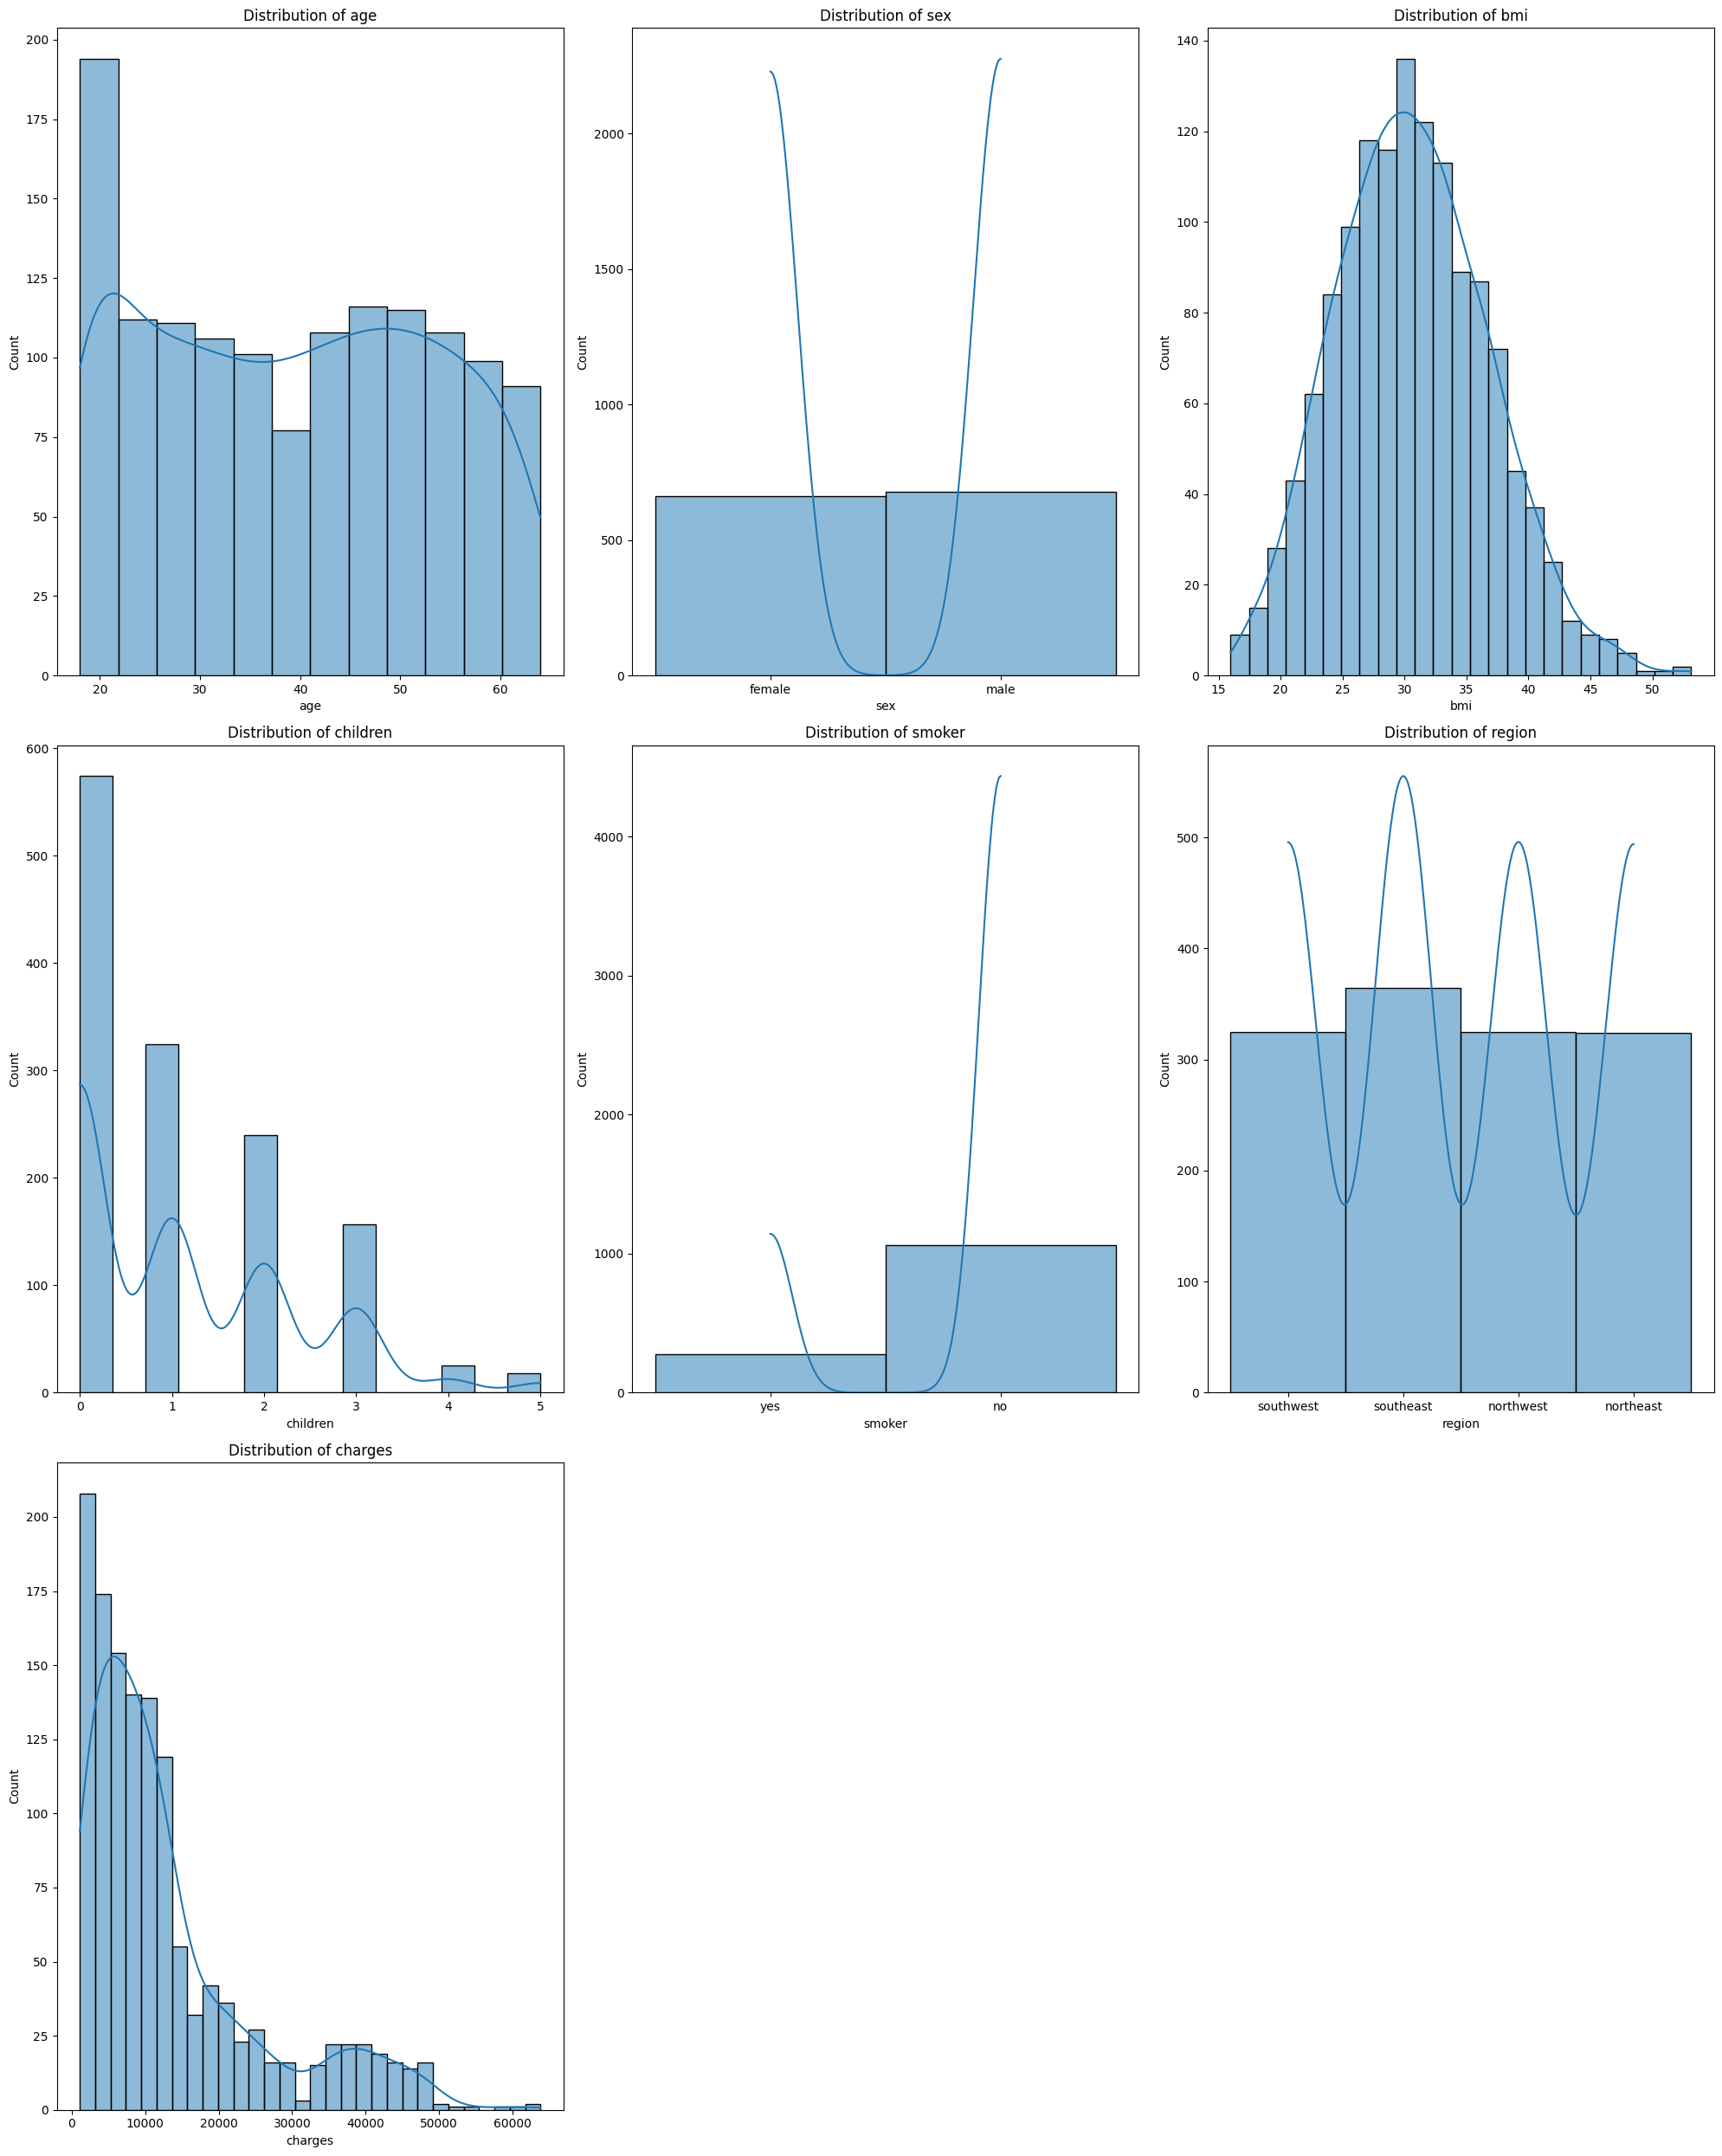

In [ ]:

graph = 1
plt.figure(figsize=(20, 25), facecolor='white')  # facecolor to white for better readability

for column in data.columns:
    if graph <= 9:  # Ensures only the first 9 columns are plotted
        ax = plt.subplot(3, 3, graph)
        sns.histplot(data[column], kde=True, ax=ax)
        ax.set_xlabel(column)
        ax.set_title(f'Distribution of {column}')  # Include column name in the title
        graph += 1

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

This code snippet generates a 3x3 grid of histograms with KDE for the first nine columns of a DataFrame, using Seaborn for visualization. It sets the figure's facecolor to pink and ensures subplots are neatly arranged with tight_layout().

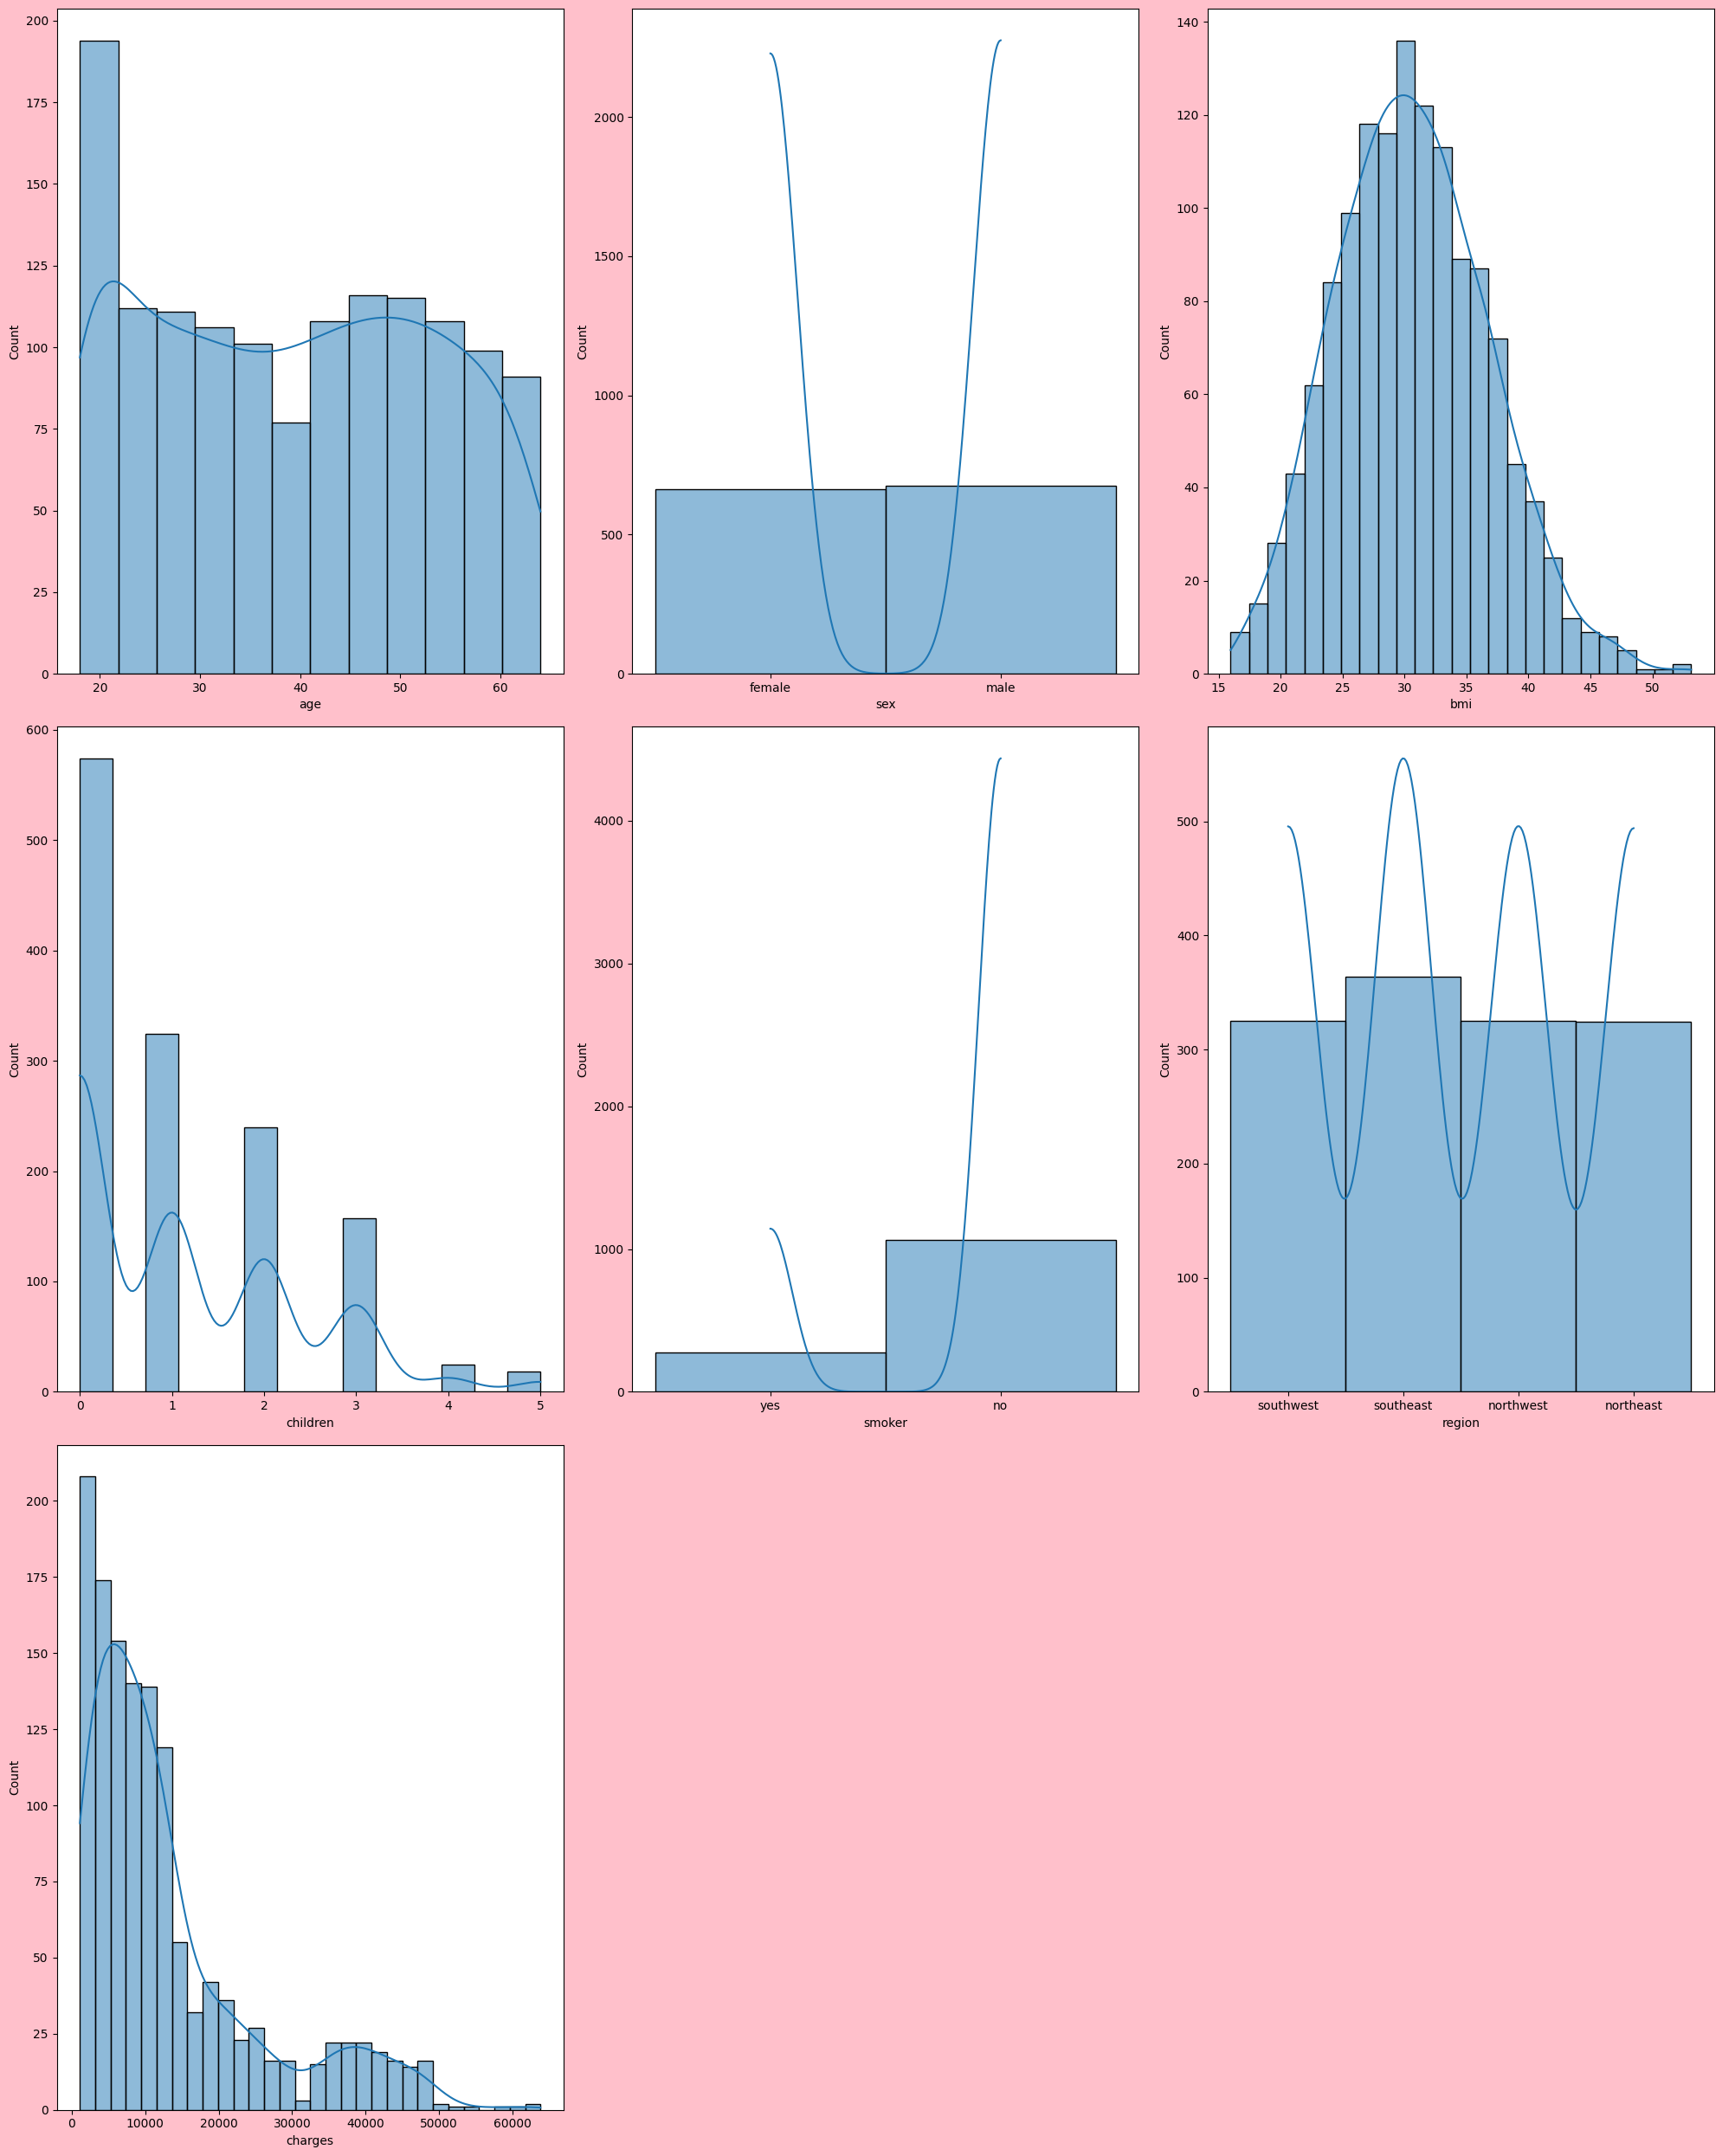

In [ ]:
plt.figure(figsize=(20, 25), facecolor='pink')  # Facecolor is set to pink

for i, column in enumerate(data.columns[:9], 1):  # Enumerate starting from 1 for subplot indexing
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.xlabel(column)

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

Now we perform some exploratory analysis

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("medical_cost_insurance.csv")

# Check for null values
print("Null values in each column:\n", data.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Handle missing values for numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle missing values for categorical columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with the mode

# Check if there are any missing values left
print("Null values after handling:\n", data.isnull().sum())

Null values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Null values after handling:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


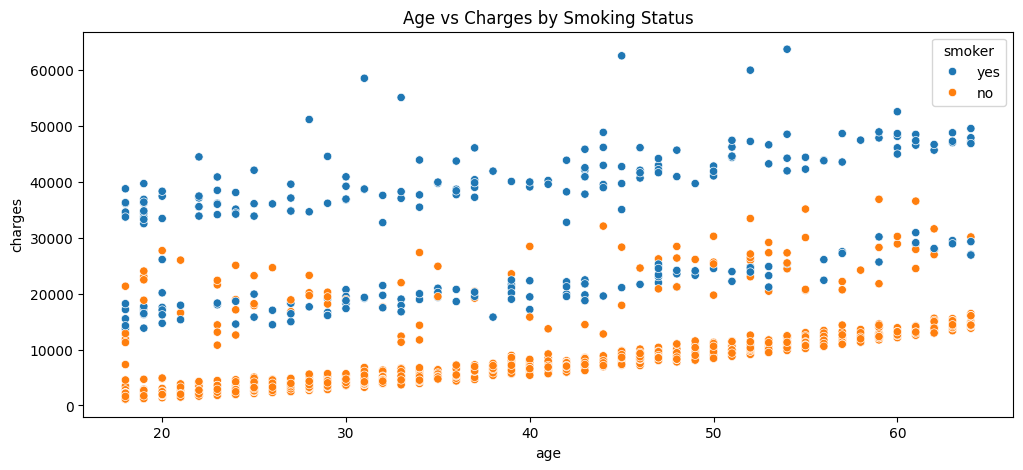

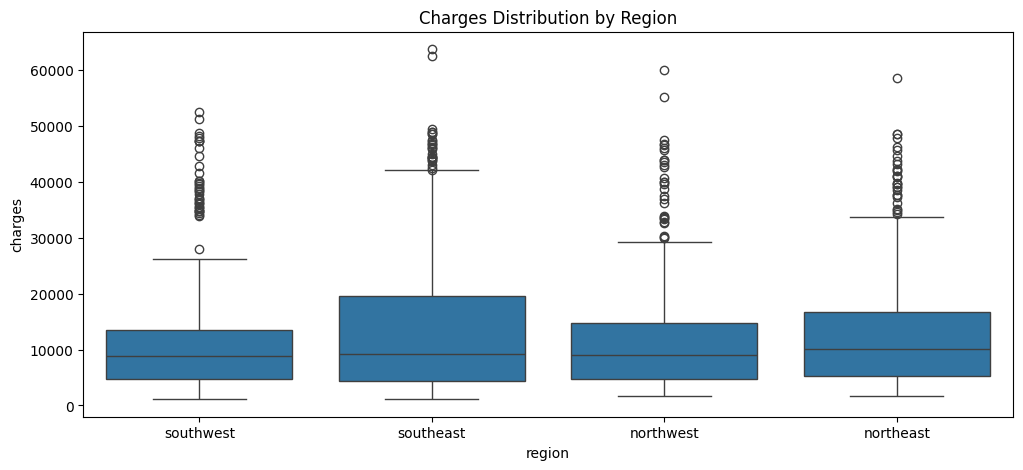

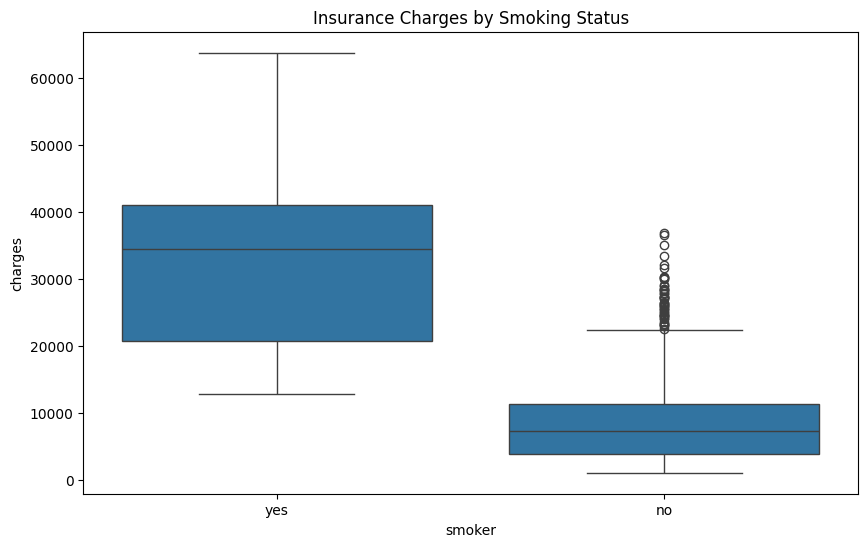

In [ ]:
# Additional insights about the dataset
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges by Smoking Status')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='region', y='charges')
plt.title('Charges Distribution by Region')
plt.show()

# Distribution of charges by smoking status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges by Smoking Status')
plt.show()

Data Preprocessing which consists of train-test split
We divide the data into seperate parts for training and testing.

Preparing our data for modeling by encoding categorical variables and scaling numerical features.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Create copy of dataframe
df_model = df.copy()

# Encode categorical variables
le = LabelEncoder()
df_model['sex'] = le.fit_transform(df_model['sex'])
df_model['smoker'] = le.fit_transform(df_model['smoker'])
df_model['region'] = le.fit_transform(df_model['region'])

# Split features and target
X = df_model.drop('charges', axis=1)
y = df_model['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Evaluating different models using cross-validation to ensure robust performance assessment.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Define models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Perform cross-validation
print("Cross-Validation Results:")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f'\n{name}:')
    print(f'Mean R2: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})')

Cross-Validation Results:

Linear Regression:
Mean R2: 0.7339 (+/- 0.0974)

Random Forest:
Mean R2: 0.8266 (+/- 0.0819)

Gradient Boosting:
Mean R2: 0.8403 (+/- 0.0867)


Training three different models (Linear Regression, Random Forest, and Gradient Boosting) and evaluating their performance using Mean Squared Error (MSE) and R² Score metrics for both training and testing data

Training multiple models and comparing their performance to select the best one.

In [ ]:
# Import required models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
print("================== Linear Regression ==================")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

print("Training MSE:", mean_squared_error(y_train, y_pred_train_lr))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test_lr))
print("R2 Score:", r2_score(y_test, y_pred_test_lr))

# Decision Tree
print("\n================== Decision Tree ==================")
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_train_dt = dt.predict(X_train_scaled)
y_pred_test_dt = dt.predict(X_test_scaled)

print("Training MSE:", mean_squared_error(y_train, y_pred_train_dt))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test_dt))
print("R2 Score:", r2_score(y_test, y_pred_test_dt))

# Random Forest
print("\n================== Random Forest ==================")
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

print("Training MSE:", mean_squared_error(y_train, y_pred_train_rf))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test_rf))
print("R2 Score:", r2_score(y_test, y_pred_test_rf))

# Gradient Boosting
print("\n================== Gradient Boosting ==================")
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_train_gb = gb.predict(X_train_scaled)
y_pred_test_gb = gb.predict(X_test_scaled)

print("Training MSE:", mean_squared_error(y_train, y_pred_train_gb))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test_gb))
print("R2 Score:", r2_score(y_test, y_pred_test_gb))

# Store results in dictionary
results = {
    'Linear Regression': {
        'train_mse': mean_squared_error(y_train, y_pred_train_lr),
        'test_mse': mean_squared_error(y_test, y_pred_test_lr),
        'r2_score': r2_score(y_test, y_pred_test_lr)
    },
    'Decision Tree': {
        'train_mse': mean_squared_error(y_train, y_pred_train_dt),
        'test_mse': mean_squared_error(y_test, y_pred_test_dt),
        'r2_score': r2_score(y_test, y_pred_test_dt)
    },
    'Random Forest': {
        'train_mse': mean_squared_error(y_train, y_pred_train_rf),
        'test_mse': mean_squared_error(y_test, y_pred_test_rf),
        'r2_score': r2_score(y_test, y_pred_test_rf)
    },
    'Gradient Boosting': {
        'train_mse': mean_squared_error(y_train, y_pred_train_gb),
        'test_mse': mean_squared_error(y_test, y_pred_test_gb),
        'r2_score': r2_score(y_test, y_pred_test_gb)
    }
}

# Add interpretation of Decision Tree results
print("\nDecision Tree Model Analysis:")
print("The Decision Tree model shows signs of overfitting:")
print("- Lower training MSE compared to testing MSE")
print("- R² score of around 0.62 indicates moderate performance")
print("- Large difference between training and testing MSE suggests the model")
print("  memorized training data rather than learning general patterns")

================== Linear Regression ==================
Training MSE: 37280663.22256598
Testing MSE: 33635210.43117845
R2 Score: 0.7833463107364536

================== Decision Tree ==================
Training MSE: 244239.5543823394
Testing MSE: 47349691.413584165
R2 Score: 0.6950075471882797

================== Random Forest ==================
Training MSE: 3685365.402717236
Testing MSE: 20907957.345388383
R2 Score: 0.8653260664709761

================== Gradient Boosting ==================
Training MSE: 14715394.941138724
Testing MSE: 18928866.266080543
R2 Score: 0.8780739392573809

Decision Tree Model Analysis:
The Decision Tree model shows signs of overfitting:
- Lower training MSE compared to testing MSE
- R² score of around 0.62 indicates moderate performance
- Large difference between training and testing MSE suggests the model
  memorized training data rather than learning general patterns


In [ ]:
# Train models and collect results
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    results[name] = {'train_score': train_score, 'test_score': test_score}
    print(f'\n{name} Results:')
    print(f'Training R2: {train_score:.4f}')
    print(f'Testing R2: {test_score:.4f}')

# Select and train final model (Random Forest)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)


Linear Regression Results:
Training R2: 0.7417
Testing R2: 0.7833

Random Forest Results:
Training R2: 0.9745
Testing R2: 0.8653

Gradient Boosting Results:
Training R2: 0.8980
Testing R2: 0.8781


RandomForestRegressor(random_state=42)

Performing hyperparameter tuning on our Random Forest model using GridSearchCV with a different set of parameters. We then evaluate the best model using multiple metrics and cross-validation to ensure robust performance.

Starting Grid Search...
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best Parameters Found:
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 350}

Final Model Performance Metrics:
Training Metrics:
MSE: 13271342.55
MAE: 2156.24
R²: 0.9081

Testing Metrics:
MSE: 19980347.96
MAE: 2726.82
R²: 0.8713

Cross-validation Results of Final Model:
Individual scores: [0.83407672 0.9085384  0.81987345 0.78732489 0.83884277]
Average CV score: 0.8377 (+/- 0.0794)


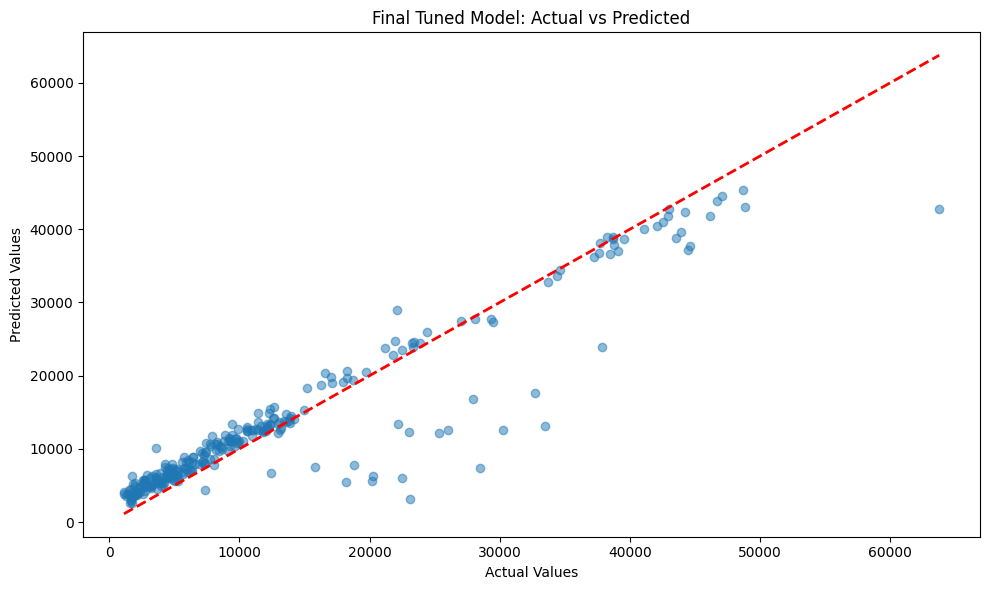

In [ ]:
# Hyperparameter Tuning (after cross-validation)
from sklearn.model_selection import GridSearchCV

# Define Random Forest model for tuning
rf_tune = RandomForestRegressor(random_state=42)

# Define different parameter grid
param_grid = {
    'n_estimators': [150, 250, 350],
    'max_depth': [8, 15, 25],
    'min_samples_split': [3, 6, 9],
    'min_samples_leaf': [2, 3, 5],
    'max_features': ['sqrt', 'log2']
}

# Perform GridSearchCV
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=rf_tune,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("\nBest Parameters Found:")
print(grid_search.best_params_)

# Get best model
best_rf_model = grid_search.best_estimator_

# Comprehensive Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get predictions
train_predictions = best_rf_model.predict(X_train_scaled)
test_predictions = best_rf_model.predict(X_test_scaled)

# Calculate various metrics
print("\nFinal Model Performance Metrics:")
print("Training Metrics:")
print(f"MSE: {mean_squared_error(y_train, train_predictions):.2f}")
print(f"MAE: {mean_absolute_error(y_train, train_predictions):.2f}")
print(f"R²: {r2_score(y_train, train_predictions):.4f}")

print("\nTesting Metrics:")
print(f"MSE: {mean_squared_error(y_test, test_predictions):.2f}")
print(f"MAE: {mean_absolute_error(y_test, test_predictions):.2f}")
print(f"R²: {r2_score(y_test, test_predictions):.4f}")

# Cross-validation of final model
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation Results of Final Model:")
print(f"Individual scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Visualize final model predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Final Tuned Model: Actual vs Predicted')
plt.tight_layout()
plt.show()

Model Performance analysis to evaluate our final model's performance using various metrics and visualizations.


Random Forest Final Metrics:
R2 Score: 0.8653
RMSE: 4572.52


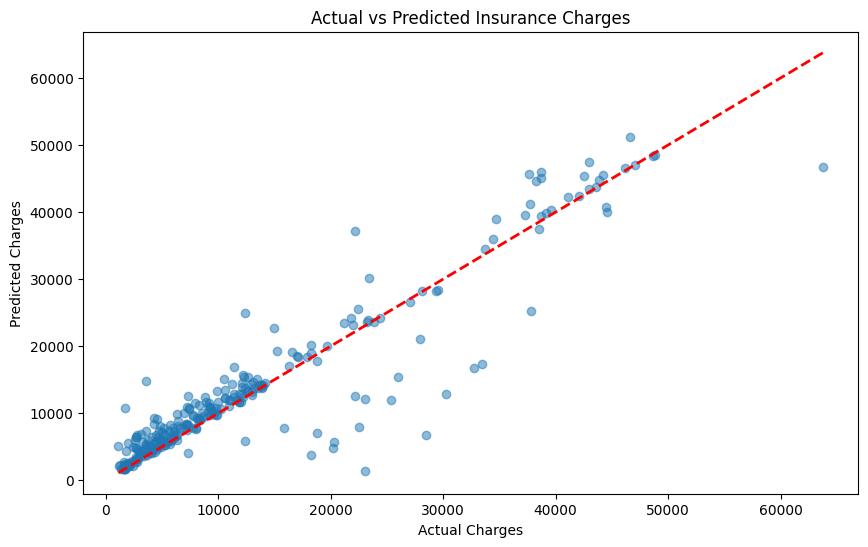

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
print('\nRandom Forest Final Metrics:')
print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()

Analyzing which features have the most impact on predicting insurance charges

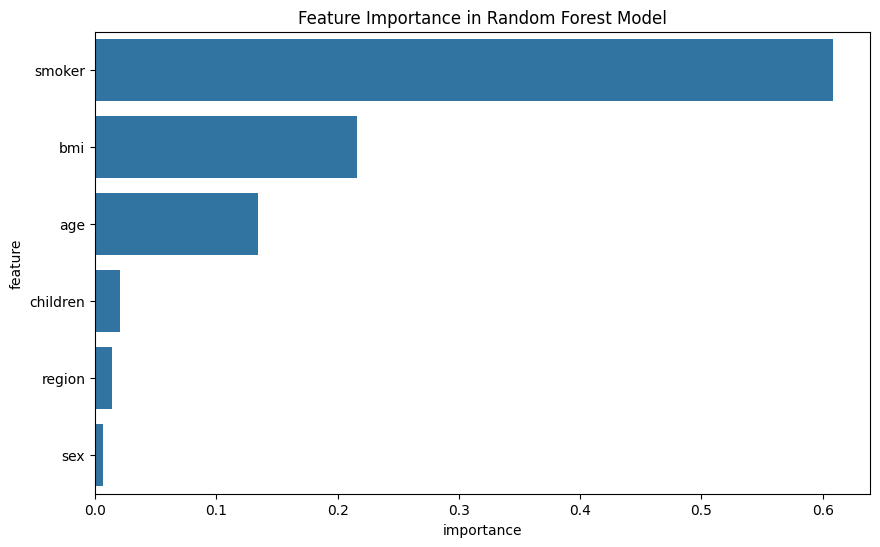

In [ ]:
# Calculate and plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

Analyzing the model's residuals to understand prediction errors and identify any patterns.

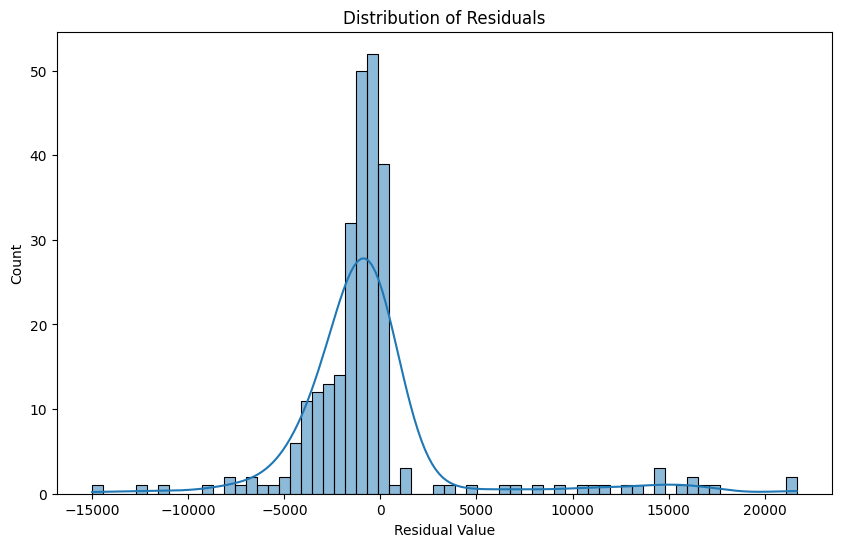

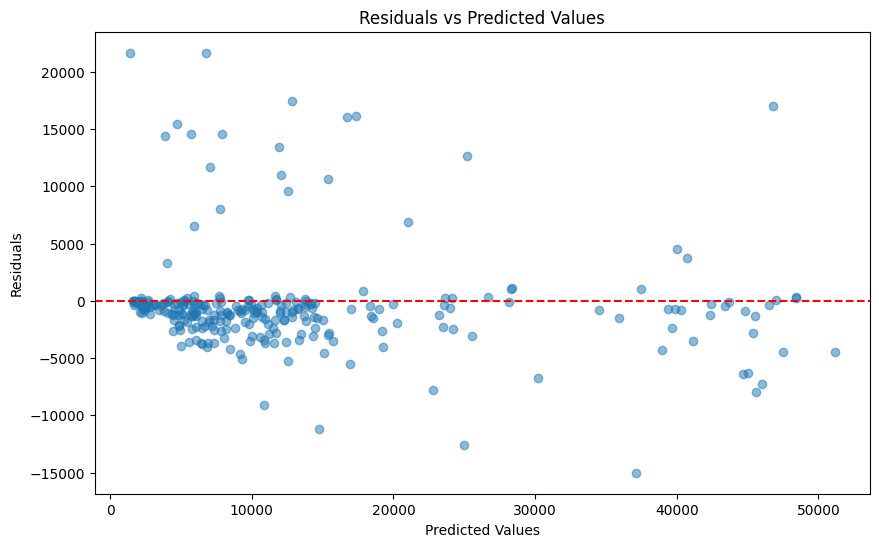

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.show()

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()